In [1]:
#Imports library

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations as cmb
from random import random as rnd
import numpy as np
import collections
from scipy.special import binom
from math import factorial
from scipy.stats import poisson

In [2]:



# Erdos-Renyi graph function, takes nodes'n' and probability 'p' """
def ER(n, p):
    """Returns a Random Graph according to Erdos-Renyi work"""  
    
    """Parameters
    -----------
     n: int Number of nodes
     p:  Probability of each link/edge is rewired to a random chosen node
     """
    #generating vertex with given node 'n' without a repetition
    V = set([v for v in range(n)])
    
    #generating edges by  adding them to nodes randomly using the probability 'p' given
    E = set()
    for i in cmb(V, 2):
        a = rnd()
        if a < p:
            E.add(i)

    #using networkx library to add vertex and nodes
    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)
    return g



In [61]:
def Degree_Frequency(Gh):
        "This function plots the  frequency polt of a graoh usind the generated data"
        deg_seq = sorted([d for n, d in Gh.degree()], reverse=True) 
        dcount = collections.Counter(deg_seq)
        degree, count2 = zip(*dcount.items())
        fig, ax = plt.subplots()
        ax.set_xticks([d + 0.4 for d in degree])
        ax.set_xticklabels(degree)
        plt.figure(3)
        plt.bar(degree, count2, width=0.60, color='g')
        plt.title("Frequence plot for degrees of nodes for Random Graph")
        plt.ylabel("Count")
        plt.xlabel("Degree")
   

In [92]:
def Fit_model(Gh):
    
    "This function fits a a binomial and poisson model to the obtained data of the given graph"
    #defining values for distributions
    kav = int(p*(n-1))
    kval = np.arange(1,n+1)
    kval2 = np.arange(1,n+1,50)
    pk = np.zeros(n,dtype=float)
    bnom = np.zeros(len(kval2),dtype=float)
    pos = np.zeros(len(kval2),dtype=float)
    i=0
    for k in kval:
        pk[i] = binom(n-1,k)*(p**k)*(1-p)**(n-1-k)
        i=i+1
    i=0
    for k in kval2:
        bnom[i] =poisson.pmf(k,kav)
        i=i+1
    plt.plot(kval,pk,label='Binomial')
    plt.plot(kval2,bnom,'ro',label='Poisson')
    plt.plot(kval2,pos,'gs',label='Poisson (scipy)')
    plt.title('Random Graph Node Distribution at n = {} and p = {}'.format(n,p))
    plt.xlim(0,200)
    plt.ylim(10**(-92),1)
    plt.xlabel('degree')
    plt.ylabel('degree distribution')
    plt.legend()
    return

In [93]:


def ERG(Gh):
    
    """This functions takes an argument of a random graph function and uses it to report the number of edges, nodes. It also output 
    the average of a degree and the variance. It plots the frequency distribution plot  and also draws the given graph
    """


    #Draws the graph
    position = nx.spring_layout(Gh)


    nx.draw_networkx(Gh, position)
    
    #Reports the number of nodes and edges of the graph
    print("The number of edges for this graph is",len(Gh.edges()))
    print("The number of nodes for this graph is",len(Gh.nodes()))
    
    #Calculates the average and the variance of the degree of the graph and displays
    b=Gh.degree()
    "This gets the degree of the graph and then using the numpy library to calculate the average and the variance of the graph"
    c=np.mean(b)
    d=np.var(b)
    print("The average degrees of the random graph is",c) 
    print("The variance degrees of the random graph is",d)
    
    #Draws the graph and save it
    plt.figure(1)
    plt.title("Random Graph, with n={}, p={}".format(n,p))
    plt.savefig("/Users/User/Documents/Diffusion/My Assignments/diffusion-networks/List3/Random_Graph"+str(p)+".png",transparent=True)
              
    
    #Plot the frequency distribution and         
    def plot_degree_dist(Gh):
        "returns histogram of the graph"
        degrees = [Gh.degree(n) for n in Gh.nodes()]
        plt.hist(degrees)
        plt.title('Histogram of Random Graph, with n={}, p={}'.format(n,p))
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
    plt.figure(2)
    plot_degree_dist(Gh)
    
    #plots the frequency of the  degress of the nodes
    Degree_Frequency(Gh)
   
    plt.figure(5)
    #fits a model distribution(Poison and Binomial) to the obtained data
    Fit_model(Gh)
        
    return Gh


The number of edges for this graph is 0
The number of nodes for this graph is 2000
The average degrees of the random graph is 499.75
The variance degrees of the random graph is 416416.6875


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


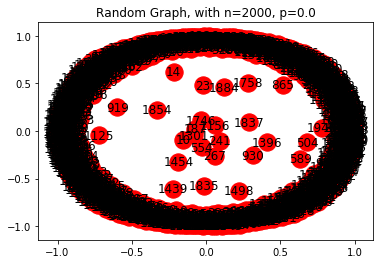

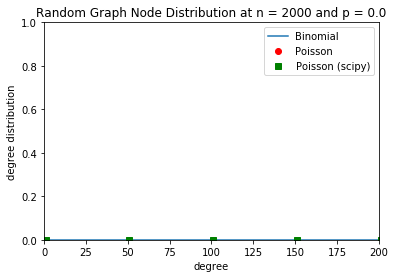

In [94]:
#Generates a random graph with node=2000, and P=0.00 and also reports some attributes of this graph in values and in plots
F1=ER(2000,0.0)
n=2000
p=0.0
ERG(F1)


The number of edges for this graph is 199884
The number of nodes for this graph is 2000
The average degrees of the random graph is 599.692
The variance degrees of the random graph is 326604.402136


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


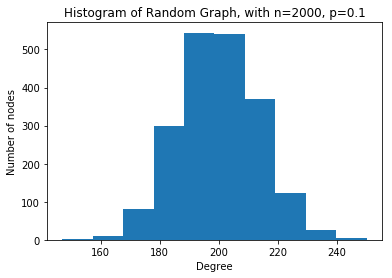

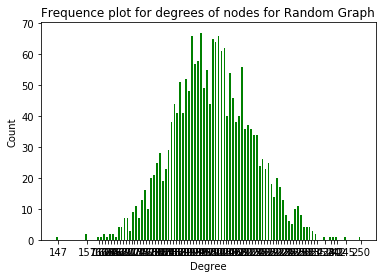

In [95]:
#Generates a random graph with node=2000, and P=0.1 and also reports some attributes of this graph in values and in plots

F2=ER(2000,0.1)
n=2000
p=0.1
ERG(F2)


The number of edges for this graph is 400399
The number of nodes for this graph is 2000
The average degrees of the random graph is 699.9495
The variance degrees of the random graph is 256560.27944975


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


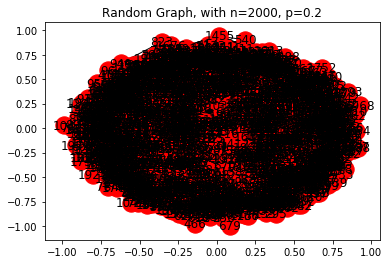

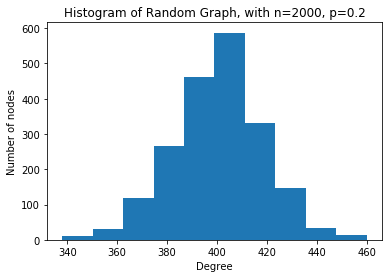

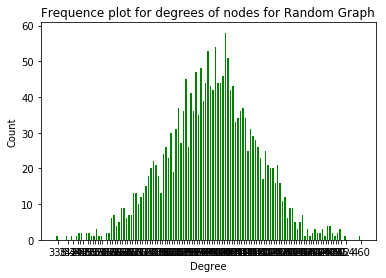

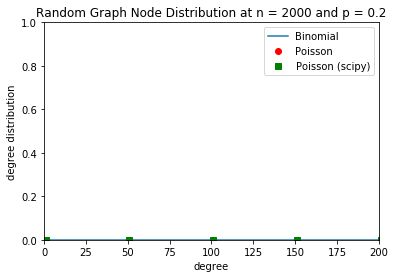

In [96]:
#Generates a random graph with node=2000, and P=0.2 and also reports some attributes of this graph in values and in plots

F3=ER(2000,0.2)
n=2000
p=0.2
ERG(F3)

The number of edges for this graph is 599067
The number of nodes for this graph is 2000
The average degrees of the random graph is 799.2835
The variance degrees of the random graph is 206962.92412775004


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


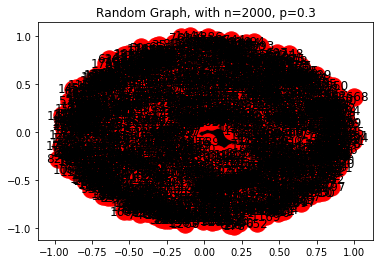

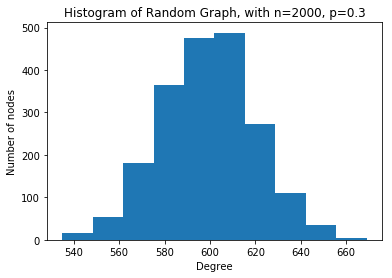

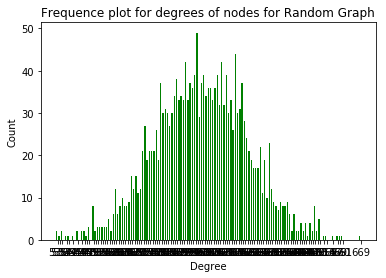

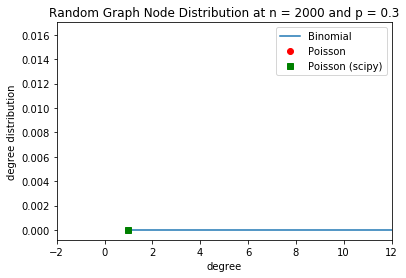

In [81]:
#Generates a random graph with node=2000, and P=0.3 and also reports some attributes of this graph in values and in plots

F4=ER(2000,0.3)
n=2000
p=0.3
ERG(F4)

The number of edges for this graph is 798781
The number of nodes for this graph is 2000
The average degrees of the random graph is 899.1405
The variance degrees of the random graph is 176980.83575975


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


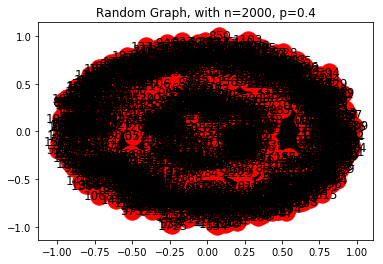

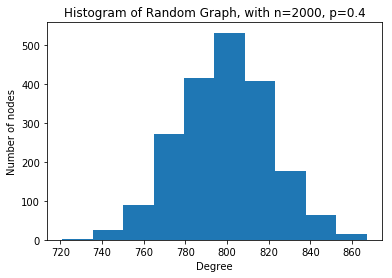

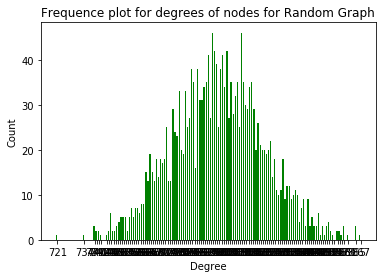

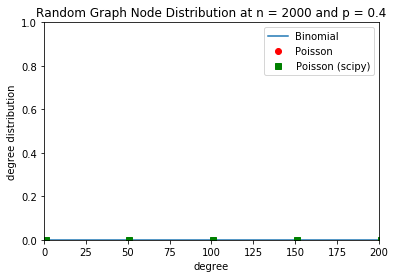

In [97]:
#Generates a random graph with node=2000, and P=0.4 and also reports some attributes of this graph in values and in plots
F5=ER(2000,0.4)
n=2000
p=0.4
ERG(F5)

The number of edges for this graph is 999234
The number of nodes for this graph is 2000
The average degrees of the random graph is 999.367
The variance degrees of the random graph is 166900.086811


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


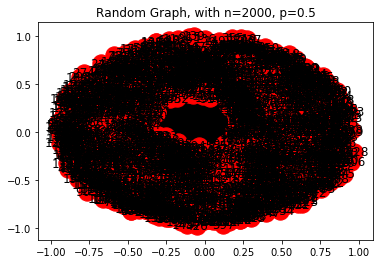

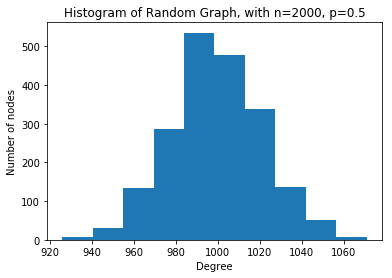

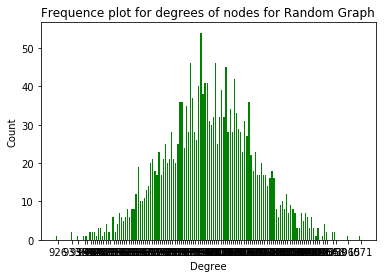

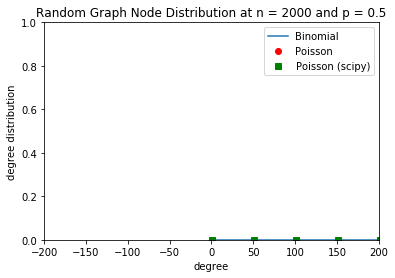

In [91]:
#Generates a random graph with node=2000, and P=0.5 and also reports some attributes of this graph in values and in plots
F6=ER(2000,0.5)
n=2000
p=0.5
ERG(F6)

In [17]:
#importing libraries to be used

import networkx as nx
import random 
import numpy as np
import matplotlib.pyplot as plt

def Watts_Strogatz_Graph(n, k,p):
    """Return a Watts–Strogatz small-world graph."""
    """"Parameters
    n: It is an integer which is the number of nodes for the graph
    k: It is an intger  with each node  connected to k nearest neighbours in a ring
    P: It is a float and it is the probability of rewiring each edge"""
   
    if k >= n:
        raise nx.NetworkXError("k>=n, choose smaller k or larger n")
    G = nx.Graph()
    nodes = list(range(n))
    """Nodes are Labeled 0 to n-1"""
    
    """connect each node to k/2 neighbors"""

    for j in range(1, k // 2 + 1):
        targets = nodes[j:] + nodes[0:j]  
        
        # first j nodes are now last in list
        G.add_edges_from(zip(nodes, targets))
        #rewire edges from each node and loop over all nodes and neigbors in order. Self or multiple loops not allowed
   
    for j in range(1, k // 2 + 1):  # The outer loop is the neigbor and the first j nodes is now last
        targets = nodes[j:] + nodes[0:j]  
        # inner loop in node order
        #Looping in order to create randomness of nodes with edges. Self loops or multiple edges will not be allowed
        
        for u, v in zip(nodes, targets):
            if random.random()< p:
                w = random.choice(nodes)
                while w == u or G.has_edge(u, w):
                    w = random.choice(nodes)
                    if G.degree(u) >= n - 1:
                        break  # skip this rewiring
                else:
                    G.remove_edge(u, v)
                    G.add_edge(u, w)
                    
                    
    #Draws the graph
    #nx.draw_circular(G,with_labels=True)
  
    #plt.title("Watts Strogatz Graph")
    #plt.savefig('/Users/User/Documents/Diffusion/My Assignments/diffusion-networks/List3/Watts Strogatz Graph.png',transparent=True)
    return G

In [98]:
def EWRG(Sh):
    
    """This functions takes an argument of a Watts Strogatz graph function and uses it to report the number of edges, nodes. It also output 
    the average of a degree and the variance. It plots the frequency distribution plot  and also draws the given graph
    """
    
    #Draws the graph
    nx.draw_circular(Sh,with_labels=True)
    
   

   
    
    #Reports the nodes and the edges of the graph
    print("The number of edges for this graph is",len(Sh.edges()))
    print("The number of nodes for this graph is",len(Sh.nodes()))
    
    #Calculates the average and the variance of the graph
    b1=Sh.degree()
    "This gets the degree of the graph and then using the numpy library to calculate the average and the variance of the graph"
    c1=np.mean(b1)
    d1=np.var(b1)
    print("The average degrees of the  Watts Strogatz Graph is",c1) 
    print("The variance degrees of the  Watts Strogatz Graph is",d1)

    #Plots the graph
    plt.figure(1)
    plt.title("Watts Strogatz Graph, with n={},p={},k={}".format(n,p,k))
    plt.savefig("/Users/User/Documents/Diffusion/My Assignments/diffusion-networks/List3/ Watts Strogatz"+str(p)+".png",transparent=True)
    
    #Plots the distribution for the graph
    def plot_degree_dist(Sh):
        "returns histogram of the graph"
        degrees = [Sh.degree(n) for n in Sh.nodes()]
        plt.hist(degrees)
        plt.title('Histogram of Watts Strogatz Graph, with n={},p={},k={}'.format(n,p,k))
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
    plt.figure(2)
    plot_degree_dist(Sh)
    
    #plots the frequency of the  degress of the nodes
    Degree_Frequency(Sh)
   
    plt.figure(5)
    #fits a model distribution(Poison and Binomial) to the obtained data
    Fit_model(Sh)
   

   
    return Sh

The number of edges for this graph is 2000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 500.75
The variance degrees of the  Watts Strogatz Graph is 415418.1875


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


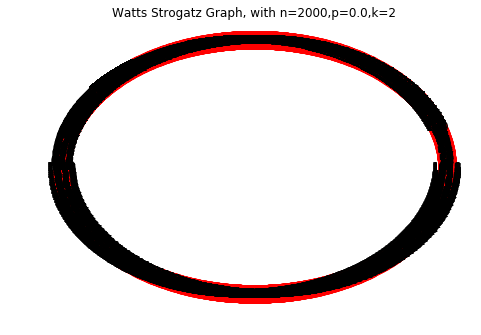

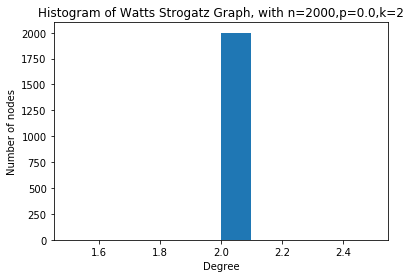

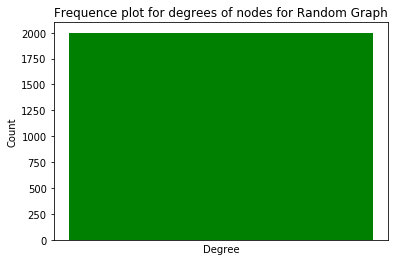

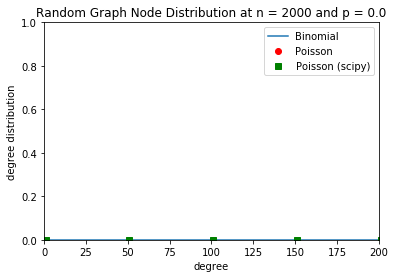

In [99]:
#Generates a Watts Strogatz graph with node=2000, and P=0.00 and also reports some attributes of this graph in values and in plots
G1=Watts_Strogatz_Graph(2000,2,0.00)
n=2000
p=0.00
k=2
EWRG(G1)


The number of edges for this graph is 4000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 501.75
The variance degrees of the  Watts Strogatz Graph is 414421.6875


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


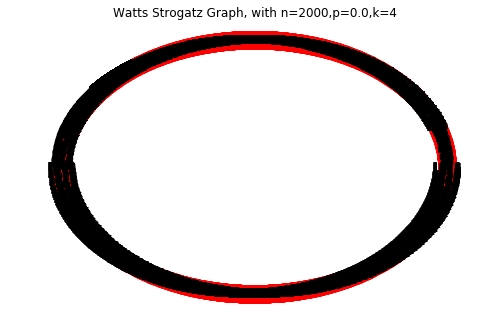

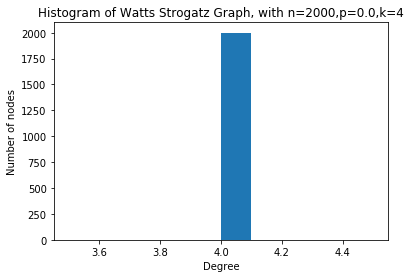

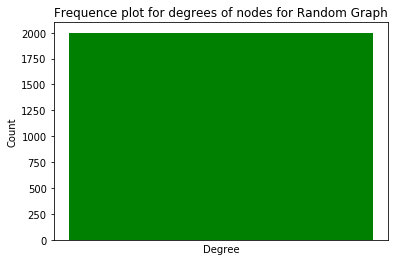

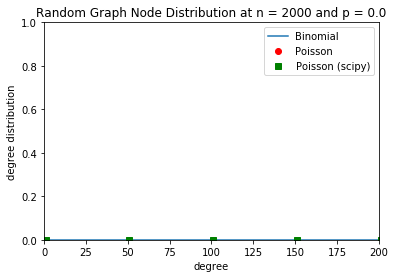

In [102]:
G11=Watts_Strogatz_Graph(2000,4,0.00)
n=2000
p=0.00
k=4
EWRG(G11)

The number of edges for this graph is 2000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 500.75
The variance degrees of the  Watts Strogatz Graph is 415418.278


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


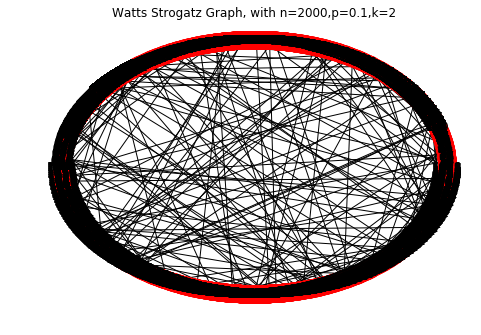

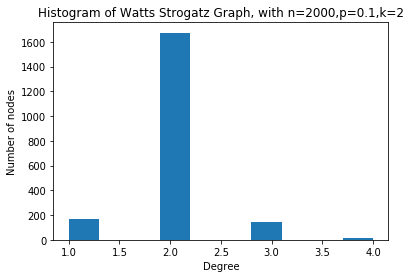

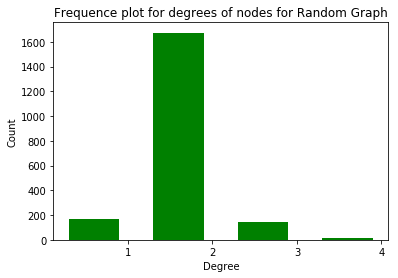

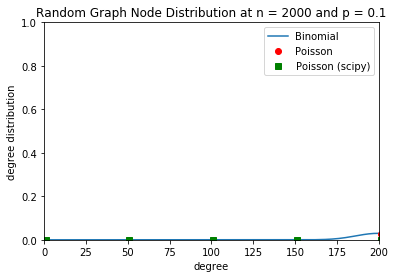

In [103]:
#Generates a Watts Strogatz graph with node=2000, and P=0.1 and also reports some attributes of this graph in values and in plots
G2=Watts_Strogatz_Graph(2000,2,0.1)
n=2000
p=0.1
k=2
EWRG(G2)

The number of edges for this graph is 4000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 501.75
The variance degrees of the  Watts Strogatz Graph is 414421.8755


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


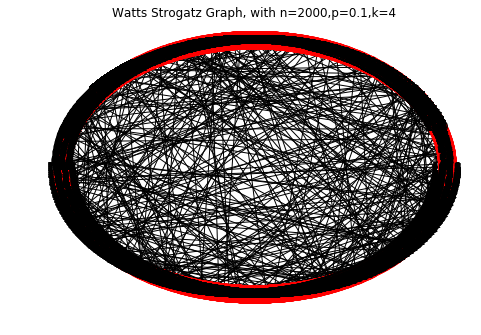

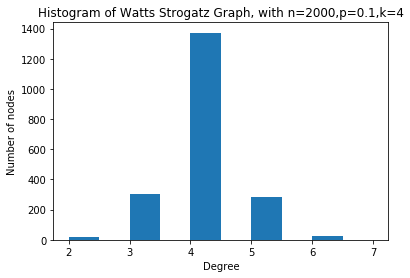

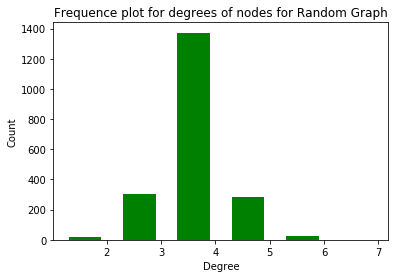

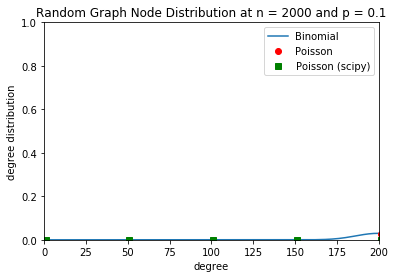

In [104]:
#Generates a Watts Strogatz graph with node=2000, and P=0.1 and also reports some attributes of this graph in values and in plots
G22=Watts_Strogatz_Graph(2000,4,0.1)
n=2000
p=0.1
k=4
EWRG(G22)

The number of edges for this graph is 4000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 501.75
The variance degrees of the  Watts Strogatz Graph is 414422.044


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


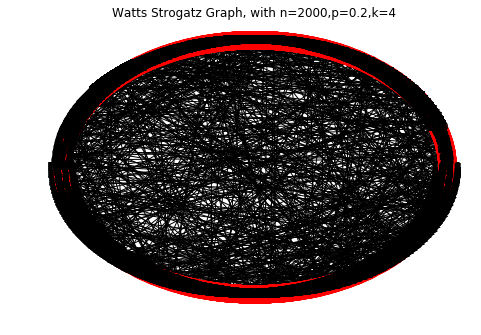

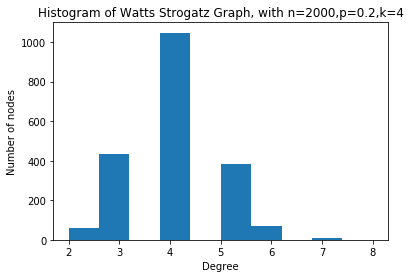

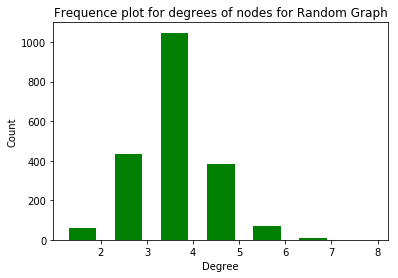

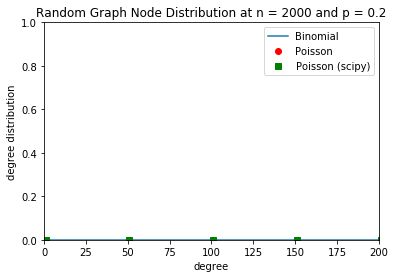

In [105]:
#Generates a Watts Strogatz graph with node=2000, and P=0.2 and also reports some attributes of this graph in values and in plots
G3=Watts_Strogatz_Graph(2000,4,0.2)
n=2000
p=0.2
k=4
EWRG(G3)

The number of edges for this graph is 10000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 504.75
The variance degrees of the  Watts Strogatz Graph is 411445.448


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


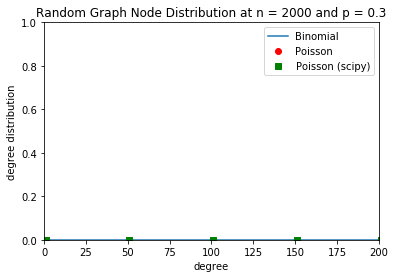

In [106]:
#Generates a Watts Strogatz graph with node=2000, and P=0.3 and also reports some attributes of this graph in values and in plots
G4=Watts_Strogatz_Graph(2000,10,0.3)
n=2000
p=0.3
k=10
EWRG(G4)

The number of edges for this graph is 24000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 511.75
The variance degrees of the  Watts Strogatz Graph is 404568.7835


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


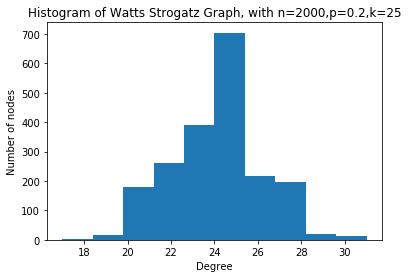

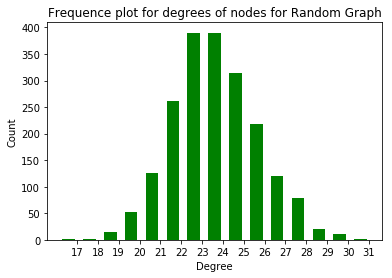

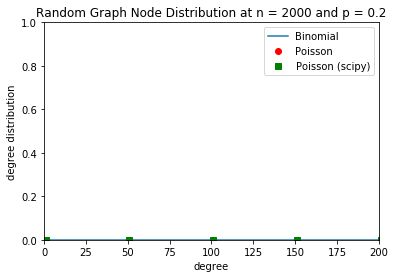

In [107]:
#Generates a Watts Strogatz graph with node=2000, and P=0.2 and also reports some attributes of this graph in values and in plots
G31=Watts_Strogatz_Graph(2000,25,0.2)
n=2000
p=0.2
k=25
EWRG(G31)

The number of edges for this graph is 50000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 524.75
The variance degrees of the  Watts Strogatz Graph is 392054.1875


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


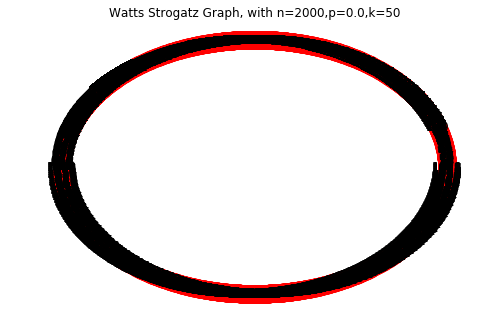

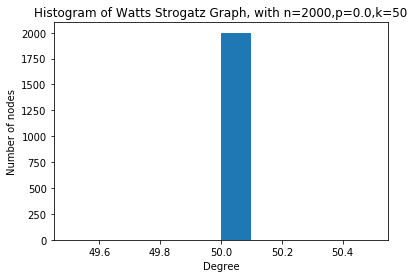

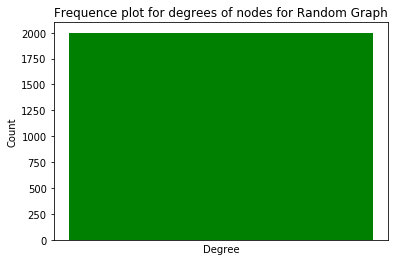

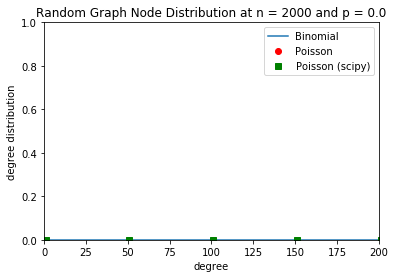

In [108]:
#Generates a Watts Strogatz graph with node=2000, and P=0.4 and also reports some attributes of this graph in values and in plots
G51=Watts_Strogatz_Graph(2000,50,0.0)
n=2000
p=0.0
k=50
EWRG(G51)

The number of edges for this graph is 50000
The number of nodes for this graph is 2000
The average degrees of the  Watts Strogatz Graph is 524.75
The variance degrees of the  Watts Strogatz Graph is 392065.822


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


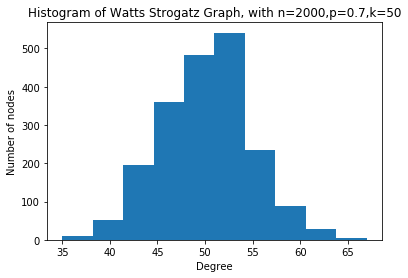

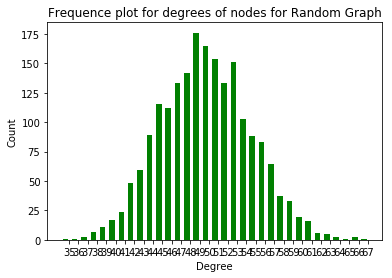

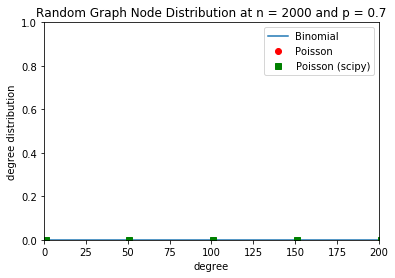

In [109]:
#Generates a Watts Strogatz graph with node=2000, and P=0.4 and also reports some attributes of this graph in values and in plots
G5=Watts_Strogatz_Graph(2000,50,0.7)
n=2000
p=0.7
k=50
EWRG(G5)

In [111]:
def Barb_Albert_Graph(n, m, mo):
    
    """Returns a random graph according to Barabasi Albert"""
    
    """"Parameters:
    n: Integer, the number of nodes
    m: Integers, number of edges attach from a new node to existing node
    m0: The initial edge, when it is not given, m=mo
    
    """
   
    #defining the conditiond for which the graph can run.
    if m < 1 or  m >=n or m > mo:
        print('Barabasi Albert network must have m>=1, m<n, m<=mo and, both m, mo and n must be integers')
    if mo is None:
        m=mo
    G = nx.complete_graph(mo)
    
    #adding nodes to tthe graph  in a range which is between the initial node and the total number of node
    for j in range(mo, n):
        G.add_node(j)
        while len(list(G.neighbors(j)))<m:
            Allowed=[x for x in G.nodes() if x not in G.neighbors(j) and x != j]
            potential_node = np.random.choice(Allowed)
            nd = G.degree(potential_node)
            np_value = nd/(len(G.edges()))
            gp = random.random()
            if gp <= np_value:
                G.add_edge(j, potential_node)
     #drawing the graph           
    nx.draw_networkx(G)
    plt.title("Barabasi Albert Graph")
    plt.savefig('/Users/User/Documents/Diffusion/My Assignments/diffusion-networks/List3/Barabasi_Albert_Graph.png',transparent=True)
    return G


In [112]:
def BAG_Dist(G):
    kav2 = np.arange(1,n+1)
    pk0 = np.zeros(n,dtype=float)
    for j in kav2:
        pk0[j-1] = 1/(j**3)
    plt.figure(3)
    plt.plot(kav2,pk0,label='pdf')
    plt.title('BA Graph Node Distribution at n = {}, m = {} and mo = {}'.format(n,m,mo))
    plt.xlim(0,200,10)
    plt.xlabel('degree')
    plt.ylabel('degree distribution')
    plt.legend()

In [128]:
def EBRG(Vh):

    
    """This functions takes an argument of Barabasi ALbert graph function and uses it to report the number of edges, nodes. It also output 
    the average of a degree and the variance. It plots the frequency distribution plot  and also draws the given graph
    """
        
     #Draws the graph   
    nx.draw_networkx(Vh,with_labels=True)
    
   

   
    
    #Reports the average and the variance of the graph
    print("The number of edges for this graph is",len(Vh.edges()))
    print("The number of nodes for this graph is",len(Vh.nodes()))
    
    #Calculates the average and the variance of the degree of the graph
    B=Vh.degree()
    "This gets the degree of the graph and then using the numpy library to calculate the average and the variance of the graph"
    C=np.mean(B)
    D=np.var(B)
    print("The average degrees of the  Barabasi Albert  Graph is",C) 
    print("The variance degrees of the  Barabasi Albert Graph is",D)

    plt.figure(1)
    plt.title("Watts Strogatz Graph, with n={},m={}".format(n,m))
    plt.savefig("/Users/User/Documents/Diffusion/My Assignments/diffusion-networks/List3/ Barabasi Albert Graph.png",transparent=True)

    def plot_degree_dist(Vh):
        "returns histogram of the graph"
        degrees = [Vh.degree(n) for n in Vh.nodes()]
        plt.hist(degrees)
        plt.title('Histogram of Barabasi Albert Graph, with n={},m={}'.format(n,m))
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
    plt.figure(2)
    plot_degree_dist(Vh)
    plt.figure(3)
    BAG_Dist(Vh)
   
   
    return Vh

In [131]:
H= Barb_Albert_Graph(200,10,10)
n=200
m=10
mo=10
EBRG(H)


The number of edges for this graph is 1945
The number of nodes for this graph is 200
The average degrees of the  Barabasi Albert  Graph is 59.475
The variance degrees of the  Barabasi Albert Graph is 3349.619375


The number of edges for this graph is 1945
The number of nodes for this graph is 200
The average degrees of the  Barabasi Albert  Graph is 59.475
The variance degrees of the  Barabasi Albert Graph is 3364.8143750000004


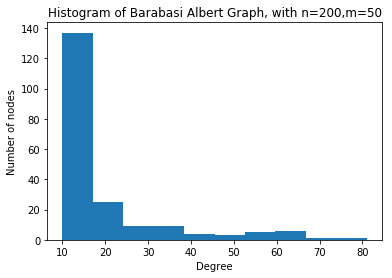

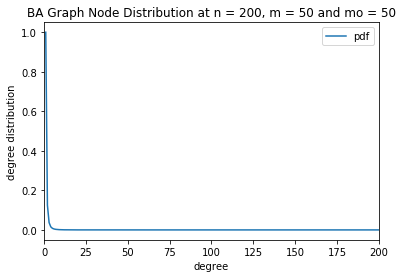

In [132]:
H= Barb_Albert_Graph(200,10,10)
n=200
m=50
mo=50
EBRG(H)

The number of edges for this graph is 1945
The number of nodes for this graph is 200
The average degrees of the  Barabasi Albert  Graph is 59.475
The variance degrees of the  Barabasi Albert Graph is 3354.964375


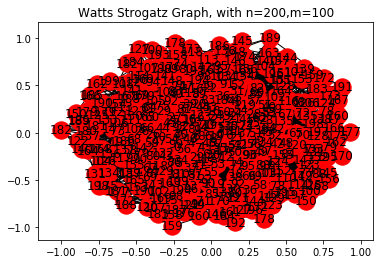

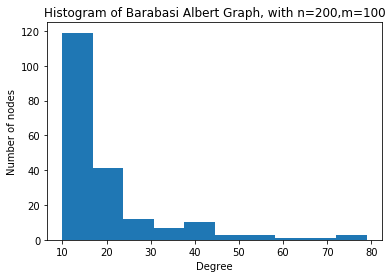

In [133]:
H= Barb_Albert_Graph(200,10,10)
n=200
m=100
mo=100
EBRG(H)

In [162]:
import urllib
link = 'http://www.livejournal.com/misc/fdata.bml?user='
"Read files from the link and save in data"
start_node = 'valerois'
response = urllib.request.urlopen(link+start_node)         
data = response.readlines()

In [135]:
data

[b'# Note: Polite data miners cache on their end.  Impolite ones get banned.\n',
 b'> bagira\n',
 b'> angerona\n',
 b'> yankel\n',
 b'> yelya\n',
 b'> ponka\n',
 b'> marinka\n',
 b'> saper\n',
 b'> levinius\n',
 b'> monella\n',
 b'> irbisa\n',
 b'> innaplanetyanka\n',
 b'> hutshepsut\n',
 b'> skyg74\n',
 b'> samoleg\n',
 b'> actr\n',
 b'> gottfrid\n',
 b'> krimsky\n',
 b'> nelis\n',
 b'> ptfenix\n',
 b'> leprechaun\n',
 b'> a_u\n',
 b'> e_f\n',
 b'> boctok\n',
 b'> karial\n',
 b'> wattson\n',
 b'> baryshnia\n',
 b'> ntl\n',
 b'> salamandrina_\n',
 b'> ant_fugue\n',
 b'> levik\n',
 b'> _milashka\n',
 b'> oonabond\n',
 b'> alinaf\n',
 b'> vollalol\n',
 b'> kitobow\n',
 b'> petitmari\n',
 b'> babushonok\n',
 b'> koniglio\n',
 b'> berryl\n',
 b'> sylphida\n',
 b'> graier\n',
 b'> drunk_cherry\n',
 b'> mamaracha\n',
 b'> doc_a\n',
 b'> 3eta\n',
 b'> togranada\n',
 b'> vorobeika\n',
 b'> mel_ny\n',
 b'> nicety\n',
 b'> elka_palka\n',
 b'> milady_winter\n',
 b'> lengo\n',
 b'> bengalia\n',
 b

In [160]:
import string as str
import requests

def LIVE(node):
    "Strips the data of unwanted sympols"
    friend = []
    link = 'http://www.livejournal.com/misc/fdata.bml?user='
    response = urllib.request.urlopen(link+node).read()
    Friend = response.readlines()
    for af in Friend: 
        af = str(af.decode())
        af = af.replace("> ","")
        af = af.replace("< ","")
        af = af.replace("\n","")
        frie.append(af)
    return frieend



In [ ]:
start_node = 'valerois'
G = nx.Graph()
friends = LIVE(start_node)
G.add_node(start_node)
for N in friends:
    G.add_node(N)
    G.add_edge(start_node, N)
    Friend = LIVE(N)
    for i in Friend:
        if i not in G.nodes():
            G.add_node(i)
        G.add_edge(N, i)
        friendnn = LIVE(i)
        for k in Friendn:
            if N not in G.nodes():
                G.add_node(k)
            G.add_edge(N, k)            
nx.draw_networkx(G)
plt.savefig('"/Users/User/Documents/Diffusion/My Assignments/diffusion-networks/List3/ Friends_friends Graph.png",transparent=True)
')
length_of_edge = len(G.edge())
length_of_node = len(G.node())
print(length_of_edge)
print(length_of_edge)